In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras

lstm = keras.models.load_model("lstm_saved_model_final.keras")

In [3]:
data_main=pd.read_csv('mergedData.csv',index_col=[0])
data_main

,Date,Close,output
0,2020-01-01,184.449997,1
1,2020-01-02,193.750000,2
2,2020-01-03,191.100006,2
3,2020-01-06,185.649994,1
4,2020-01-07,184.699997,0
...,...,...,...
927,2023-09-25,618.700012,1
928,2023-09-26,619.799988,1
929,2023-09-27,620.150024,1
930,2023-09-28,614.099976,1


In [4]:
data=data_main.drop("Date",axis=1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scale_1=MinMaxScaler(feature_range=(0,1))

In [6]:
data=scale_1.fit_transform(data)

In [7]:
n=10
length=data.shape[0]

li=[]
for i in range(0,n):
    li.append(data[length-n+i][0])
    li.append(data[length-n+i][1])

li.pop()
li

[0.9826425076721536,
 1.0,
 0.9936960907165867,
 1.0,
 0.9899827496617964,
 0.5,
 0.9702072531008613,
 0.0,
 0.9588083312357988,
 0.5,
 0.9557858786518282,
 0.5,
 0.9576856638244119,
 0.5,
 0.9582902175900742,
 0.5,
 0.947841082896523,
 0.5,
 0.9756477099179205]

In [8]:
sentiments=pd.read_csv('sentiments.csv')
sentiments

,output
0,2
1,1
2,2
3,0
4,0


In [9]:
scale_2=MinMaxScaler(feature_range=(0,1))
sentiments=scale_2.fit_transform(sentiments)
sentiments

array([[1. ],
       [0.5],
       [1. ],
       [0. ],
       [0. ]])

In [10]:
j=0
li.append(sentiments[j][0])
j+=1
li

[0.9826425076721536,
 1.0,
 0.9936960907165867,
 1.0,
 0.9899827496617964,
 0.5,
 0.9702072531008613,
 0.0,
 0.9588083312357988,
 0.5,
 0.9557858786518282,
 0.5,
 0.9576856638244119,
 0.5,
 0.9582902175900742,
 0.5,
 0.947841082896523,
 0.5,
 0.9756477099179205,
 1.0]

In [11]:
days=5
pred_values=[]
for i in range(days):
    newInput=np.array(li)
    newInput=np.reshape(newInput,(1,20))
    pred=lstm.predict(newInput)
    pred_values.append(pred[0][0])
    
    if i==4:
        break
        
    li.pop(0)
    li.pop(0)
    li.append(pred[0][0])
    li.append(sentiments[j][0])
    j+=1
    
print(pred_values)

1/1 [==============================] - 0s 27ms/step
[0.8854222, 0.88121575, 0.8747563, 0.86418456, 0.8868356]


In [12]:
dummy=data_main['Close']
dummy=pd.DataFrame(dummy)
scaler=MinMaxScaler(feature_range=(0,1))
dummy=scaler.fit_transform(dummy)

In [13]:
pred_values=pd.DataFrame(pred_values)
pred_values=scaler.inverse_transform(pred_values)

In [16]:
pred_values

array([[577.9595 ],
       [575.5239 ],
       [571.7839 ],
       [565.66284],
       [578.77783]], dtype=float32)

In [17]:
original=np.array(data_main['Close'][900:])
final_pred=np.append(original,pred_values)

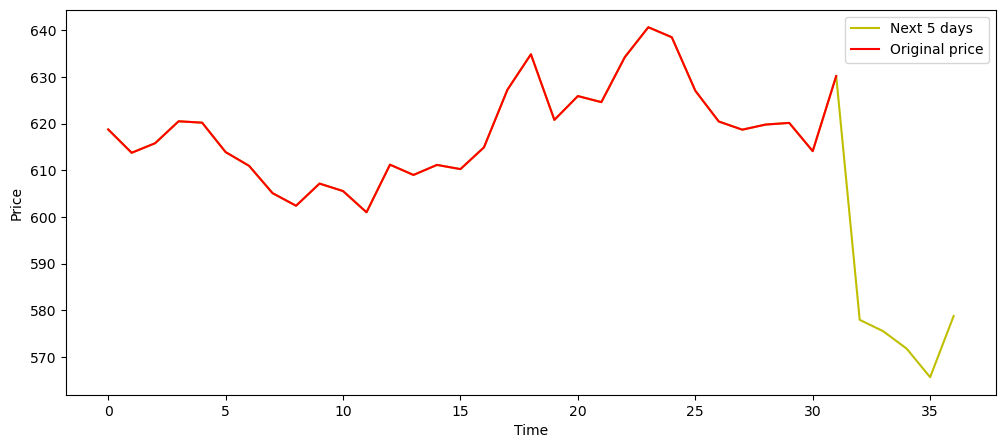

In [19]:
plt.figure(figsize=(12,5))
plt.plot(final_pred,'y' ,label='Next 5 days')
plt.plot(original,'r' ,label='Original price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()